<a href="https://colab.research.google.com/github/NGUYEN-CONG-VINH/BAI_TAP_TUAN5_AI/blob/main/time_rice_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 51.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8e644086de72eb88012af98d476961aa2be6b60f144867d367a5cb79e15c5899
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

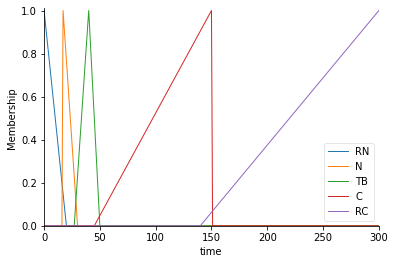

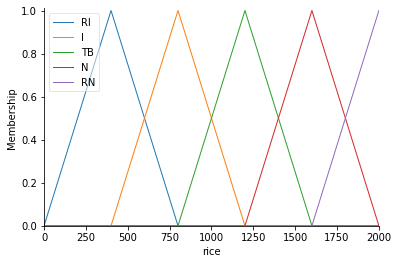

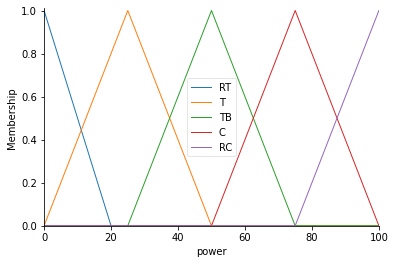

In [15]:
from skfuzzy.control.fuzzyvariable import trimf
time = ctrl.Antecedent(np.arange(0,301,1), 'time')
rice = ctrl.Antecedent(np.arange(0,2001,1), 'rice')
power = ctrl.Consequent(np.arange(0,101,1), 'power')
time['RN']=fuzz.trimf(time.universe, [0 ,0, 20])
time['N']=fuzz.trimf(time.universe, [17 ,17, 30])
time['TB']=fuzz.trimf(time.universe, [27 ,40, 50])
time['C']=fuzz.trimf(time.universe, [45 ,150, 150])
time['RC']=fuzz.trimf(time.universe, [140 ,300, 300])
rice['RI']=fuzz.trimf(rice.universe, [0 ,400, 800])
rice['I']=fuzz.trimf(rice.universe, [400 ,800, 1200])
rice['TB']=fuzz.trimf(rice.universe, [800 ,1200, 1600])
rice['N']=fuzz.trimf(rice.universe, [1200 ,1600, 2000])
rice['RN']=fuzz.trimf(rice.universe, [1600 ,2000, 2000])
power['RT']=fuzz.trimf(power.universe,[0,0,20])
power['T']=fuzz.trimf(power.universe,[0,25,50])
power['TB']=fuzz.trimf(power.universe,[25,50,75])
power['C']=fuzz.trimf(power.universe,[50,75,100])
power['RC']=fuzz.trimf(power.universe,[75,100,100])
time.view()
rice.view()
power.view()

8.809523809523807


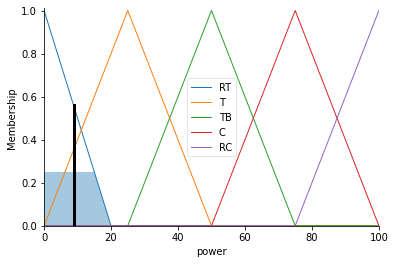

In [16]:
rule1=ctrl.Rule(time['RC']&rice['RI'],power['RT'])
rule2=ctrl.Rule(time['C']&rice['RI'],power['RT'])
rule3=ctrl.Rule(time['TB']&rice['RI'],power['T'])
rule4=ctrl.Rule(time['N']&rice['RI'],power['T'])
rule5=ctrl.Rule(time['RN']&rice['RI'],power['TB'])

rule6=ctrl.Rule(time['RC']&rice['I'],power['RT'])
rule7=ctrl.Rule(time['C']&rice['I'],power['T'])
rule8=ctrl.Rule(time['TB']&rice['I'],power['T'])
rule9=ctrl.Rule(time['N']&rice['I'],power['TB'])
rule10=ctrl.Rule(time['RN']&rice['I'],power['C'])

rule11=ctrl.Rule(time['RC']&rice['TB'],power['T'])
rule12=ctrl.Rule(time['C']&rice['TB'],power['T'])
rule13=ctrl.Rule(time['TB']&rice['TB'],power['TB'])
rule14=ctrl.Rule(time['N']&rice['TB'],power['C'])
rule15=ctrl.Rule(time['RN']&rice['TB'],power['C'])

rule16=ctrl.Rule(time['RC']&rice['N'],power['T'])
rule17=ctrl.Rule(time['C']&rice['N'],power['TB'])
rule18=ctrl.Rule(time['TB']&rice['N'],power['C'])
rule19=ctrl.Rule(time['N']&rice['N'],power['C'])
rule20=ctrl.Rule(time['RN']&rice['N'],power['RC'])

rule21=ctrl.Rule(time['RC']&rice['RN'],power['TB'])
rule22=ctrl.Rule(time['C']&rice['RN'],power['C'])
rule23=ctrl.Rule(time['TB']&rice['RN'],power['C'])
rule24=ctrl.Rule(time['N']&rice['RN'],power['RC'])
rule25=ctrl.Rule(time['RN']&rice['RN'],power['RC'])

power_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
power1=ctrl.ControlSystemSimulation(power_ctrl)
power1.input['time']=200
power1.input['rice']=100
power1.compute()
print(power1.output['power'])
power.view(sim=power1)